In [1]:
import theano.tensor as T
import lasagne
import theano
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
output_shape = [None,3,1,50]
_target = T.tensor4("inp", dtype="float32")

In [5]:
from retina.layers import LocalInhibitionLayer1D
_nn = lasagne.layers.InputLayer(shape = output_shape,name='ref.target',
                                input_var=(_target*2-1)*10)
_nn = LocalInhibitionLayer1D(_nn,name="local_softmax",n=5, k=10., alpha=1)
print _nn

In [8]:
_prediction = lasagne.layers.get_output(_nn)
predict = theano.function([_target],_prediction,mode=theano.compile.mode.FAST_COMPILE)

shape: Shape.0


In [11]:
img_folder = "/mnt/KSfinder/"
import os
X = np.load(os.path.join(img_folder,"ksfinder_images.npy"))
y = np.load(os.path.join(img_folder,"ksfinder_targets.npy"))
print X.shape,y.shape

(27185, 4, 32, 32) (27185, 3, 50)


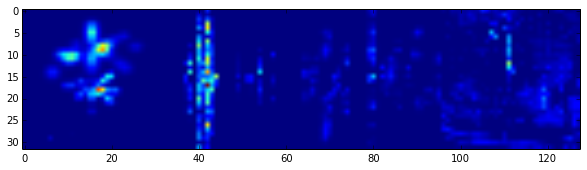

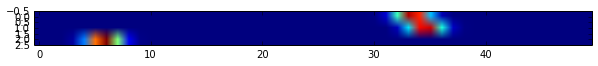

In [12]:
i = 0
plt.figure(figsize=[10,3])
plt.imshow(np.hstack(X[i]))
plt.show()
plt.figure(figsize=[10,3])
plt.imshow(np.vstack(y[i]))
plt.show()

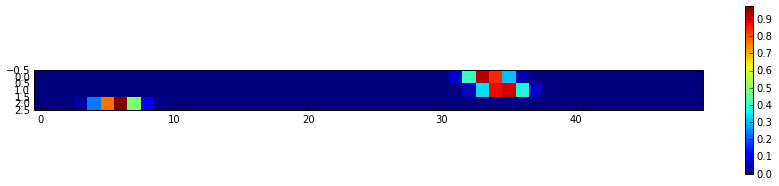

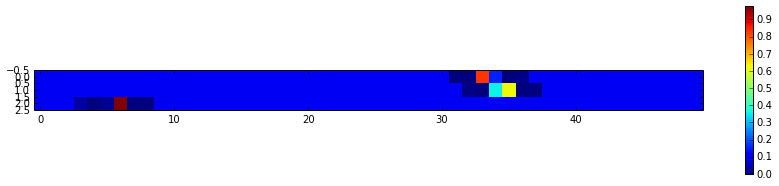

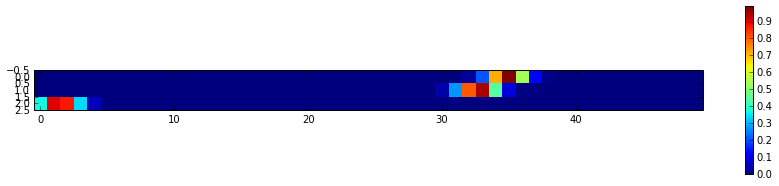

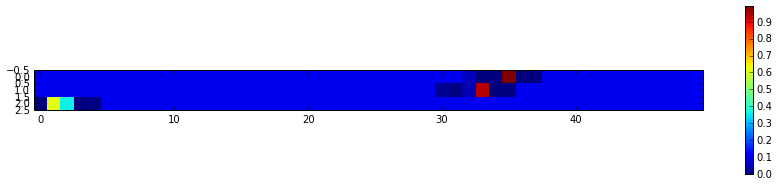

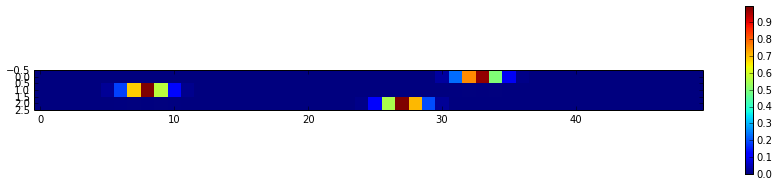

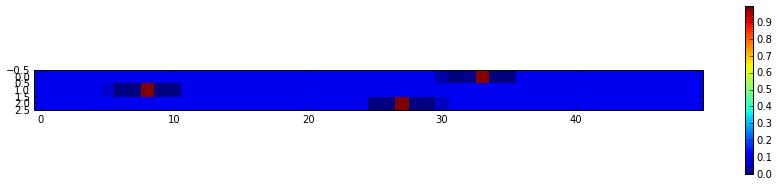

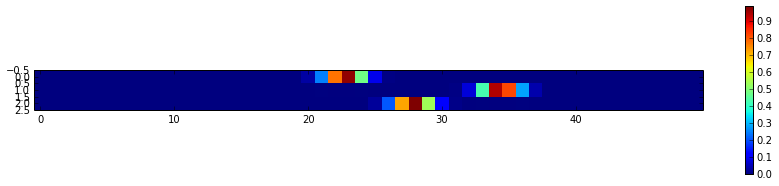

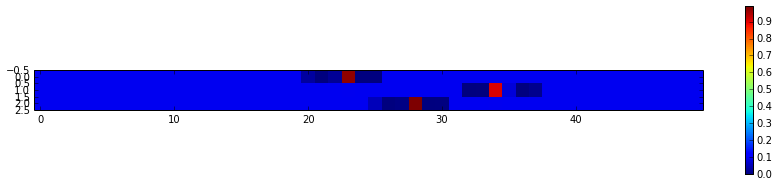

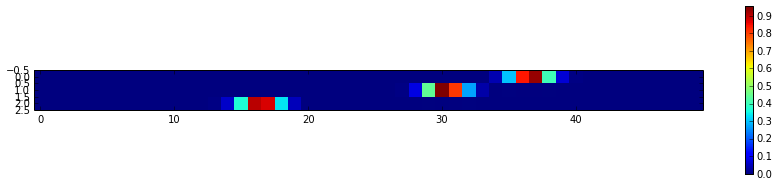

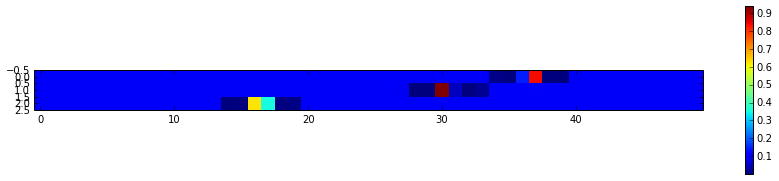

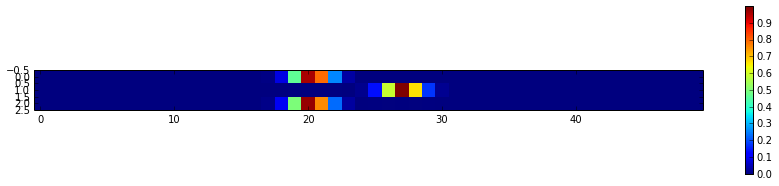

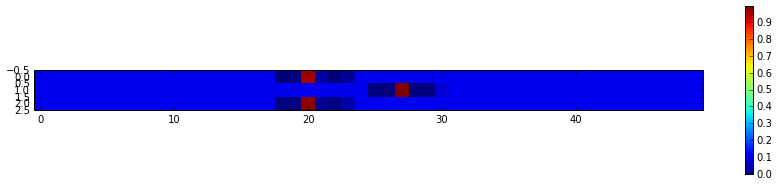

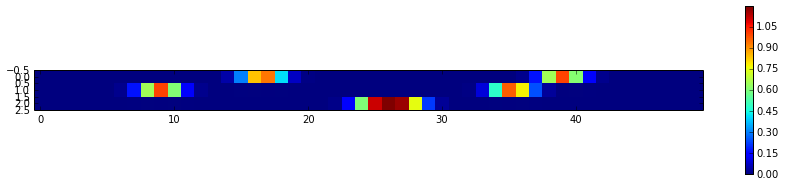

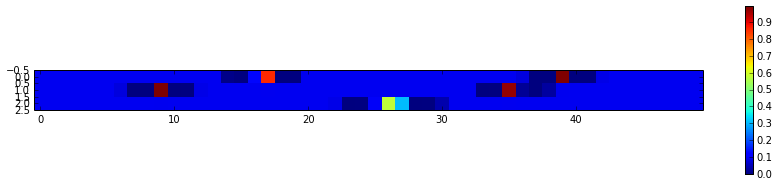

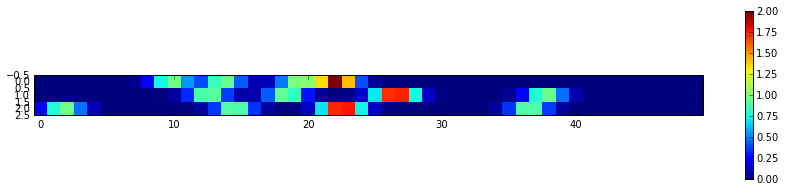

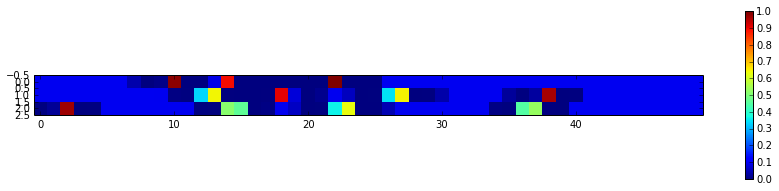

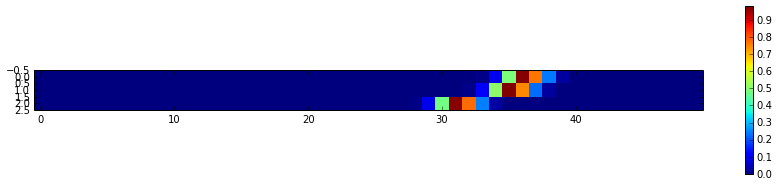

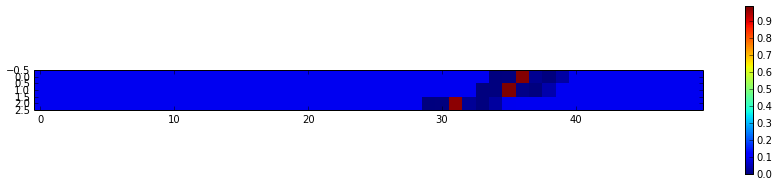

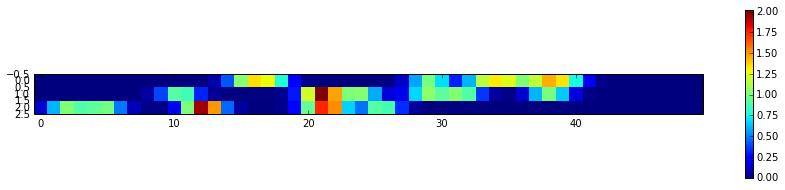

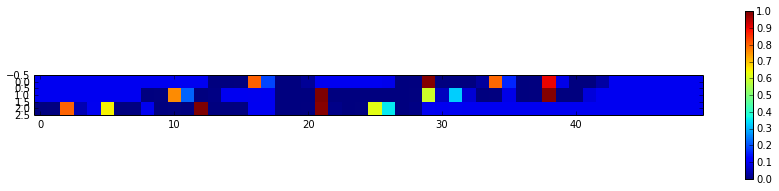

In [16]:
y = y.reshape([-1]+output_shape[1:]).astype('float32')
y_pred = predict(y)
y_pred.shape



for i in range(10):

    plt.figure(figsize=[15,3])
    plt.imshow(y[i].reshape(-1,50),interpolation='none')
    plt.colorbar()
    plt.show()

    plt.figure(figsize=[15,3])
    plt.imshow(y_pred[i].reshape(-1,50),interpolation='none')
    plt.colorbar()
    plt.show()